<a href="https://colab.research.google.com/github/sisiyotakele/gdsc_study_session_ML_g1/blob/main/Week_2/housePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


# **Load data**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [5]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Dataset Shape: (545, 13)
Number of rows: 545, Number of columns: 13


In [7]:
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [13]:
X = df[['area']]
y = df['price']

# **Split the data into training and testing sets**
## **80% for training , 20% for testing**

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Data Split Information:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Data Split Information:
Training set size: 436 samples
Testing set size: 109 samples


# **Create and train the Linear Regression model**

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **Display model coefficients**

In [17]:
print(f"Intercept (bias): {model.intercept_:.2f}")
print(f"Coefficient for area: {model.coef_[0]:.2f}")

Intercept (bias): 2512254.26
Coefficient for area: 425.73


# **Make predictions on the test**

In [19]:
y_pred = model.predict(X_test)
results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred,
    'Area': X_test.values.flatten()
})

print("Sample Predictions (First 10 rows):")
print(results_df.head(10))

Sample Predictions (First 10 rows):
   Actual Price  Predicted Price  Area
0       4060000     5.024060e+06  5900
1       6650000     5.279498e+06  6500
2       3710000     4.232203e+06  4040
3       6440000     4.640903e+06  5000
4       2800000     4.198144e+06  3960
5       4900000     5.373159e+06  6720
6       5250000     6.139473e+06  8520
7       4543000     4.636646e+06  4990
8       2450000     3.891619e+06  3240
9       3353000     3.661725e+06  2700


# **Calculate evaluation metrics**
## **Measure performance**

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 3675286604768.19
Root Mean Squared Error (RMSE): 1917103.70
Mean Absolute Error (MAE): 1474748.13


# **R-squared score (coefficient of determination)**

In [21]:
r_squared = model.score(X_test, y_test)
print(f"R-squared Score: {r_squared:.4f}")

R-squared Score: 0.2729


# **# Visualization 1: Regression Line**

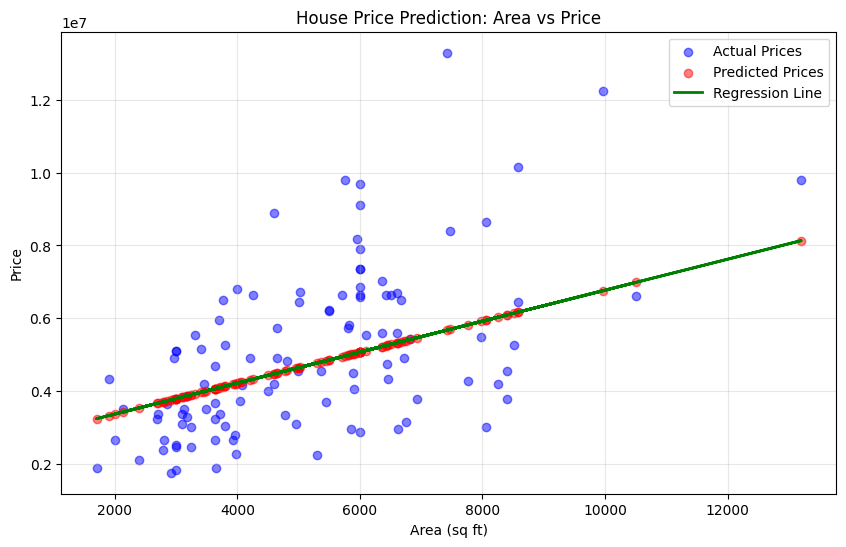

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted Prices')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('House Price Prediction: Area vs Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('regression_line.png')
plt.show()

# **Visualization 2: Residuals Plot**

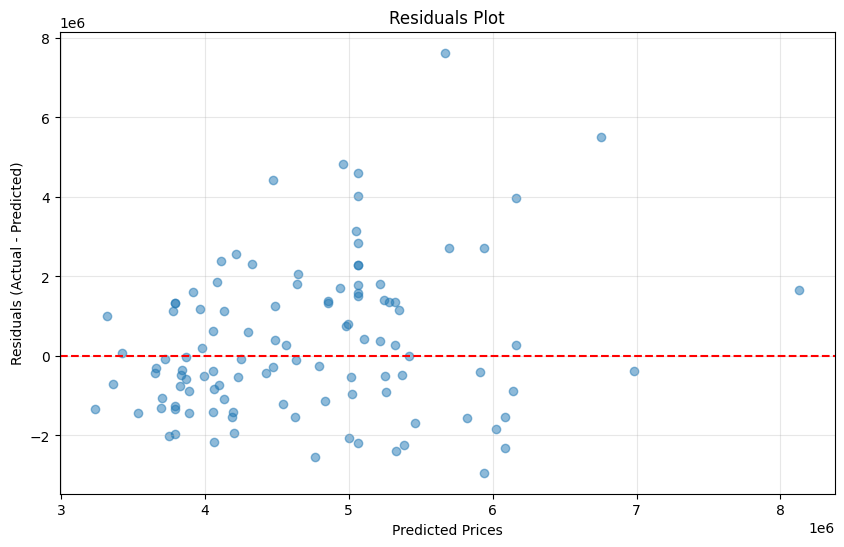

In [23]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)
plt.savefig('residuals_plot.png')
plt.show()

# **Visualization 3: Distribution of Errors**

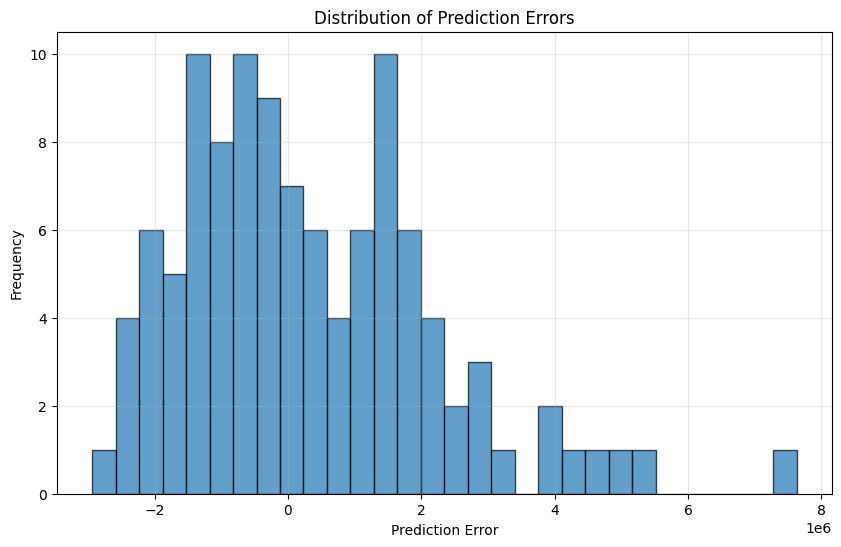

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True, alpha=0.3)
plt.savefig('error_distribution.png')
plt.show()


# **Make a prediction for a new house**

In [25]:
new_area = 8000
new_price = model.predict([[new_area]])
print(f"Prediction for a house with {new_area} sq ft area:")
print(f"Predicted Price: ${new_price[0]:,.2f}")

Prediction for a house with 8000 sq ft area:
Predicted Price: $5,918,093.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
